In [10]:
import pandas as pd

In [11]:
data = pd.read_csv(r'C:\Users\Aria\OneDrive\Desktop\Data Science Course\Chapter 4\DescriptiveStatistics\flights.csv')
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [12]:
data['arr_delay'].mean()

np.float64(6.89537675731489)

In [13]:
data['arr_delay']

0         11.0
1         20.0
2         33.0
3        -18.0
4        -25.0
          ... 
336771     NaN
336772     NaN
336773     NaN
336774     NaN
336775     NaN
Name: arr_delay, Length: 336776, dtype: float64

In [14]:
from scipy import stats
stats.trim_mean(data['arr_delay'], 0.1)

np.float64(0.9612355338465307)

In [15]:
data['arr_delay'].median()

-5.0

In [16]:
data['arr_delay'].mode()

0   -13.0
Name: arr_delay, dtype: float64

In [17]:
data['arr_delay'].var()

1992.130727102053

In [18]:
data['arr_delay'].std()

44.63329169019526

<Axes: >

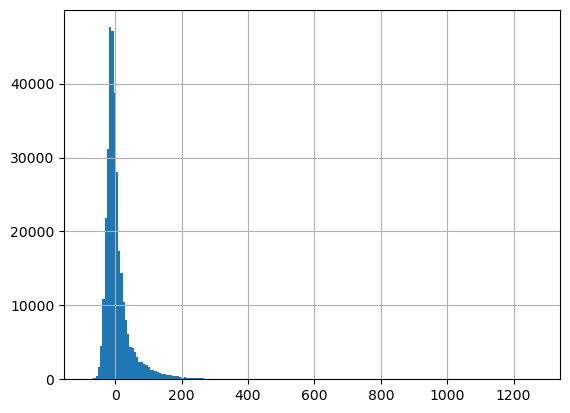

In [44]:
data['arr_delay'].hist(bins=200)

<Axes: >

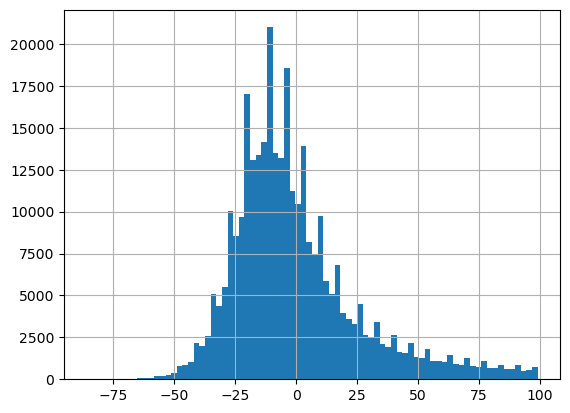

In [20]:
data['arr_delay'][data['arr_delay'] < 100].hist(bins=80)

<Axes: >

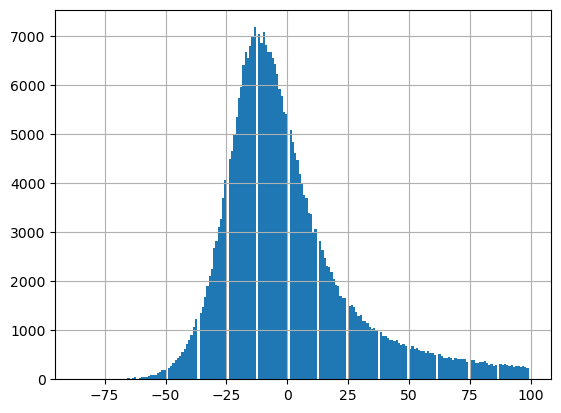

In [21]:
data['arr_delay'][data['arr_delay'] < 100].hist(bins=200)

<Axes: >

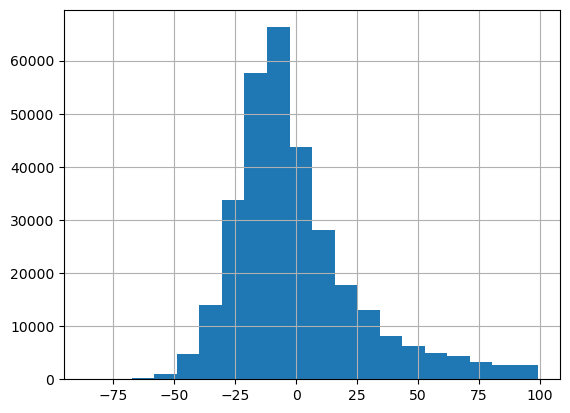

In [22]:
data['arr_delay'][data['arr_delay'] < 100].hist(bins=20)

In [23]:
data['arr_delay'].std()

44.63329169019526

In [24]:
data['arr_delay'].mean() - (3 * data['arr_delay'].std())

np.float64(-127.00449831327089)

In [25]:
data['arr_delay'].mean() + (3 * data['arr_delay'].std())

np.float64(140.79525182790067)

In [26]:
data['arr_delay'].skew()

np.float64(3.7168174804571863)

In [27]:
data['arr_delay'].kurtosis()

np.float64(29.233043998766775)

<Axes: >

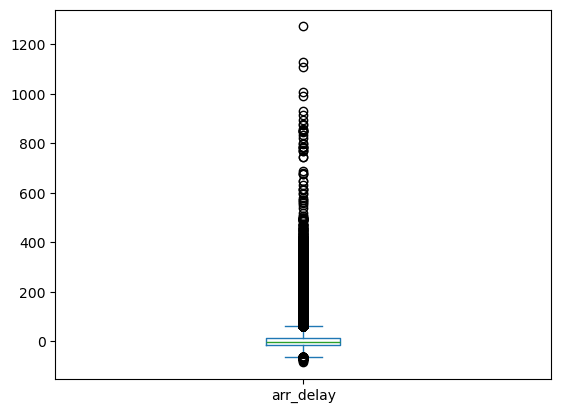

In [103]:
data['arr_delay'].plot.box(showfliers=True)

<Axes: >

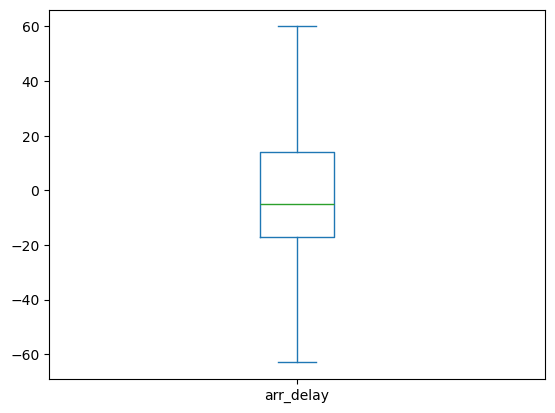

In [104]:
data['arr_delay'].plot.box(showfliers=False)

In [105]:
import numpy as np
q1 = np.percentile(data['arr_delay'], 25)
q2 = data['arr_delay'].median()
q3 = np.percentile(data['arr_delay'], 75)
iqr = q3 - q1
low_whisker = q1 - 1.5 * iqr
up_whisker = q3 + 1.5 * iqr

In [112]:
print("Q1:", q1 , "\nQ2:", q2 , "\nQ3:", q3 , "\nIQR:", iqr , "\nLow Whisker:", low_whisker , "\nUp Whisker:", up_whisker)

Q1: -17.0 
Q2: -5.0 
Q3: 14.0 
IQR: 31.0 
Low Whisker: -63.5 
Up Whisker: 60.5


In [113]:
is_outlier = (data['arr_delay'] < low_whisker) | (data['arr_delay'] > up_whisker)
outliers = data['arr_delay'][is_outlier]
num_outliers = outliers.shape[0]
pct_outliers = num_outliers / data.shape[0] * 100

print(f"Outliers count = {num_outliers} ({pct_outliers:.2f}%)")


Outliers count = 27880 (8.52%)


In [155]:
x = data[is_outlier].groupby('name')['arr_delay'].count().sort_values(ascending=False)
x1 = pd.DataFrame(x).reset_index()


In [160]:
y = data.groupby('name')['arr_delay'].count().sort_values(ascending=False)
y1 = pd.DataFrame(y).reset_index()


In [182]:
df = x1.merge(y1, on='name', how='inner')
df['compare%'] = df['arr_delay_x'] / df['arr_delay_y'] * 100
df = df.sort_values(by='compare%', ascending=False)
df.reset_index(drop=True)

,name,arr_delay_x,arr_delay_y,compare%
0,SkyWest Airlines Inc.,4,29,13.793103
1,Mesa Airlines Inc.,74,544,13.602941
2,ExpressJet Airlines Inc.,6803,51108,13.311028
3,Frontier Airlines Inc.,87,681,12.775330
4,AirTran Airways Corporation,360,3175,11.338583
5,Endeavor Air Inc.,1833,17294,10.599052
6,Envoy Air,2323,25037,9.278268
7,JetBlue Airways,4974,54049,9.202760
8,Southwest Airlines Co.,1063,12044,8.825971
9,Virgin America,386,5116,7.544957


In [186]:
data.corr(numeric_only=True)


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
id,1.000000,NaN,0.069908,0.087998,0.001921,0.000332,0.049187,-0.024916,-0.016895,0.018613,-0.000234,-0.032866,0.014855,-0.000591,0.022327
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.069908,NaN,1.000000,0.005036,-0.003735,-0.003358,-0.020055,-0.002457,-0.003145,-0.017382,0.000980,0.010924,0.020399,-0.003986,0.014984
day,0.087998,NaN,0.005036,1.000000,-0.000393,0.000077,0.000591,-0.005404,-0.002286,-0.000319,-0.000849,0.002236,0.003216,0.000041,0.000874
dep_time,0.001921,NaN,-0.003735,-0.000393,1.000000,0.954827,0.259613,0.662509,0.784442,0.232306,0.041530,-0.014619,-0.014134,0.953515,0.091416
sched_dep_time,0.000332,NaN,-0.003358,0.000077,0.954827,1.000000,0.198924,0.644387,0.780587,0.173896,0.028401,-0.015532,-0.012933,0.999149,0.083106
dep_delay,0.049187,NaN,-0.020055,0.000591,0.259613,0.198924,1.000000,0.029421,0.160497,0.914803,0.053970,-0.022405,-0.021681,0.198269,0.028251
arr_time,-0.024916,NaN,-0.002457,-0.005404,0.662509,0.644387,0.029421,1.000000,0.790789,0.024482,0.025007,0.054296,0.047189,0.644368,0.040746
sched_arr_time,-0.016895,NaN,-0.003145,-0.002286,0.784442,0.780587,0.160497,0.790789,1.000000,0.133261,0.013947,0.078918,0.073614,0.780562,0.049435
arr_delay,0.018613,NaN,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522
